In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

CSV_list

'AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR'

In [2]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']
# start_date = '2016-01-01'
# end_date = '2021-01-01'

In [3]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
# date.head()

In [6]:
box = get_prices(stocks,'2015-01-01','2020-01-01')
# box.head()

In [7]:
df = pd.DataFrame(np.array(box).T, columns=stocks , index=np.array(date).T)
df.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


In [8]:
df.to_csv('/Users/paxton615/Desktop/13stocks.csv')

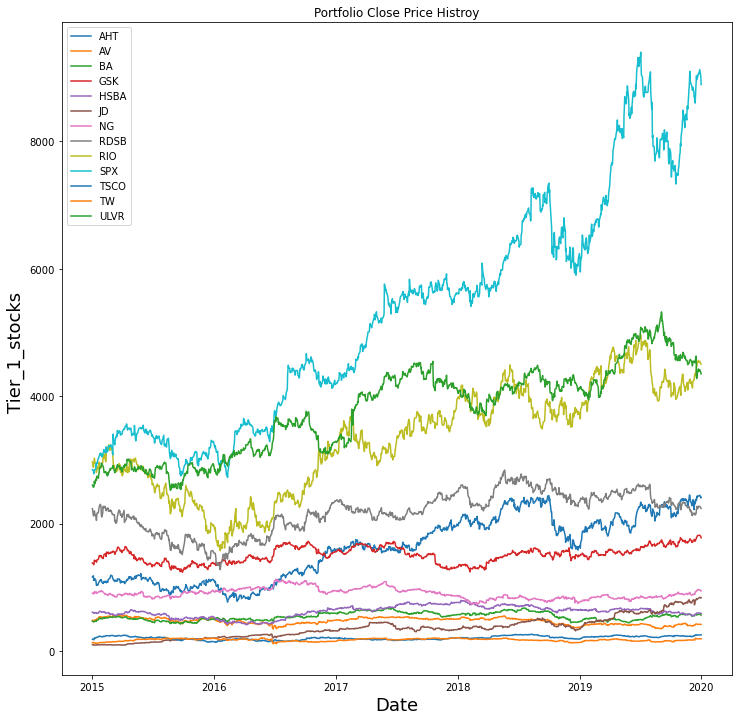

In [9]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [10]:
# show the daily simple return
returns = df.pct_change() #  pct_change = (day_price - previous_day_price) / previous_day_price
returns.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.014592,-0.028076,-0.015345,-0.009761,-0.013235,-0.001969,0.001541,-0.047864,-0.029125,-0.005618,-0.034042,-0.008154,-0.012663
2015-01-06,-0.061760,-0.014443,-0.011472,-0.009127,-0.016890,-0.069034,-0.014181,-0.003524,0.021155,-0.016949,-0.015419,-0.020179,0.000389
2015-01-07,0.000000,-0.001509,0.013138,0.016212,0.012296,0.008051,0.023082,0.012966,0.006113,0.005747,0.017897,0.009916,0.006605
2015-01-08,0.019838,0.042953,0.013400,0.035170,0.008652,0.019336,0.016240,0.023970,0.021941,0.017500,0.149725,0.003021,0.029718


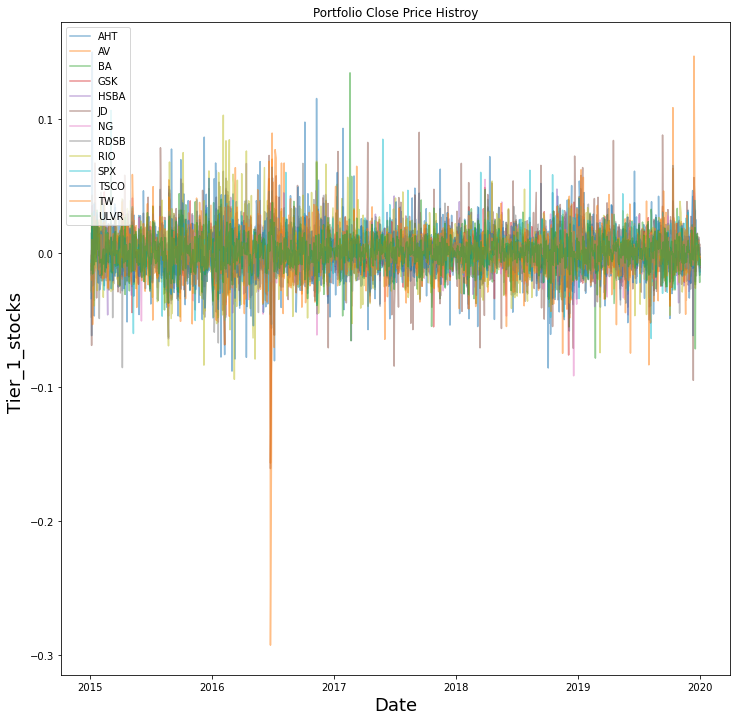

In [11]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = returns

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c, alpha=0.5)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [12]:
# check the covariance among stocks
returns.cov()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.000364,0.000125,0.000100,0.000065,0.000106,0.000090,0.000026,0.000107,0.000154,0.000120,0.000072,0.000118,0.000046
AV,0.000125,0.000225,0.000079,0.000046,0.000102,0.000100,0.000032,0.000084,0.000107,0.000080,0.000106,0.000164,0.000040
BA,0.000100,0.000079,0.000158,0.000051,0.000066,0.000064,0.000034,0.000061,0.000066,0.000068,0.000056,0.000073,0.000043
GSK,0.000065,0.000046,0.000051,0.000139,0.000060,0.000025,0.000055,0.000074,0.000058,0.000043,0.000044,0.000024,0.000072
HSBA,0.000106,0.000102,0.000066,0.000060,0.000162,0.000044,0.000033,0.000095,0.000117,0.000063,0.000065,0.000066,0.000049
JD,0.000090,0.000100,0.000064,0.000025,0.000044,0.000369,0.000033,0.000041,0.000033,0.000058,0.000073,0.000163,0.000032
NG,0.000026,0.000032,0.000034,0.000055,0.000033,0.000033,0.000130,0.000047,0.000023,0.000027,0.000034,0.000045,0.000062
RDSB,0.000107,0.000084,0.000061,0.000074,0.000095,0.000041,0.000047,0.000232,0.000162,0.000065,0.000078,0.000031,0.000057
RIO,0.000154,0.000107,0.000066,0.000058,0.000117,0.000033,0.000023,0.000162,0.000397,0.000080,0.000095,0.000057,0.000036
SPX,0.000120,0.000080,0.000068,0.000043,0.000063,0.000058,0.000027,0.000065,0.000080,0.000187,0.000056,0.000066,0.000051


In [13]:
# create the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.091711,0.031482,0.025276,0.016485,0.026719,0.022561,0.006583,0.026949,0.038883,0.030363,0.018164,0.029857,0.011713
AV,0.031482,0.056723,0.019827,0.011504,0.025766,0.025216,0.008068,0.021233,0.027026,0.020102,0.026691,0.041358,0.009958
BA,0.025276,0.019827,0.039751,0.012796,0.016659,0.016220,0.008641,0.015420,0.016554,0.017178,0.014208,0.018329,0.010833
GSK,0.016485,0.011504,0.012796,0.034916,0.015233,0.006406,0.013779,0.018704,0.014629,0.010876,0.011201,0.005982,0.018069
HSBA,0.026719,0.025766,0.016659,0.015233,0.040852,0.011188,0.008297,0.023993,0.029509,0.015878,0.016457,0.016574,0.012447
JD,0.022561,0.025216,0.016220,0.006406,0.011188,0.093041,0.008373,0.010270,0.008330,0.014704,0.018384,0.040963,0.007945
NG,0.006583,0.008068,0.008641,0.013779,0.008297,0.008373,0.032811,0.011753,0.005798,0.006735,0.008488,0.011313,0.015708
RDSB,0.026949,0.021233,0.015420,0.018704,0.023993,0.010270,0.011753,0.058495,0.040877,0.016497,0.019669,0.007853,0.014435
RIO,0.038883,0.027026,0.016554,0.014629,0.029509,0.008330,0.005798,0.040877,0.100044,0.020286,0.023884,0.014391,0.008965
SPX,0.030363,0.020102,0.017178,0.010876,0.015878,0.014704,0.006735,0.016497,0.020286,0.047140,0.014189,0.016559,0.012823


先创建均分的weights

In [14]:
weight = 1/len(stocks)
weights = np.full(shape=len(stocks), fill_value=weight, dtype=np.float)
# weights

In [15]:
# calculate the portfolio variance
port_variance = np.dot(weights.T , np.dot(cov_matrix_annual, weights))
port_variance

0.02074021458094824

In [16]:
# calculate the portfolio volatility aka std
port_volatility = np.sqrt(port_variance)
port_volatility

0.14401463321811517

In [17]:
# calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.12179913923814203

In [18]:
# show the expected annual return, volatility(risk), varicance
percent_var = str( round(port_variance, 2) * 100)+ '%'
percent_vols = str( round(port_volatility, 2) *100)+ '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print('expected annual return:'+ percent_ret)
print('annual volatility/risk:'+ percent_vols)
print('annual variance:'+ percent_var)

expected annual return:12.0%
annual volatility/risk:14.000000000000002%
annual variance:2.0%


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns

In [20]:
# portfolio optimization!

# calculate expected returns and the annualised sample cov matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [21]:
mu

AHT     0.156464
AV     -0.028663
BA      0.037693
GSK     0.051523
HSBA   -0.006641
JD      0.523255
NG      0.007786
RDSB    0.000357
RIO     0.086584
SPX     0.254982
TSCO    0.062873
TW      0.074520
ULVR    0.107662
dtype: float64

In [22]:
S

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.091711,0.031482,0.025276,0.016485,0.026719,0.022561,0.006583,0.026949,0.038883,0.030363,0.018164,0.029857,0.011713
AV,0.031482,0.056723,0.019827,0.011504,0.025766,0.025216,0.008068,0.021233,0.027026,0.020102,0.026691,0.041358,0.009958
BA,0.025276,0.019827,0.039751,0.012796,0.016659,0.016220,0.008641,0.015420,0.016554,0.017178,0.014208,0.018329,0.010833
GSK,0.016485,0.011504,0.012796,0.034916,0.015233,0.006406,0.013779,0.018704,0.014629,0.010876,0.011201,0.005982,0.018069
HSBA,0.026719,0.025766,0.016659,0.015233,0.040852,0.011188,0.008297,0.023993,0.029509,0.015878,0.016457,0.016574,0.012447
JD,0.022561,0.025216,0.016220,0.006406,0.011188,0.093041,0.008373,0.010270,0.008330,0.014704,0.018384,0.040963,0.007945
NG,0.006583,0.008068,0.008641,0.013779,0.008297,0.008373,0.032811,0.011753,0.005798,0.006735,0.008488,0.011313,0.015708
RDSB,0.026949,0.021233,0.015420,0.018704,0.023993,0.010270,0.011753,0.058495,0.040877,0.016497,0.019669,0.007853,0.014435
RIO,0.038883,0.027026,0.016554,0.014629,0.029509,0.008330,0.005798,0.040877,0.100044,0.020286,0.023884,0.014391,0.008965
SPX,0.030363,0.020102,0.017178,0.010876,0.015878,0.014704,0.006735,0.016497,0.020286,0.047140,0.014189,0.016559,0.012823


In [23]:
# optimaize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print(ef.portfolio_performance(verbose=True))

OrderedDict([('AHT', 0.0), ('AV', 0.0), ('BA', 0.0), ('GSK', 0.0), ('HSBA', 0.0), ('JD', 0.57651), ('NG', 0.0), ('RDSB', 0.0), ('RIO', 0.0), ('SPX', 0.40785), ('TSCO', 0.0), ('TW', 0.0), ('ULVR', 0.01564)])
Expected annual return: 40.7%
Annual volatility: 21.4%
Sharpe Ratio: 1.81
(0.40734142754843045, 0.21446709421396695, 1.8060646038407753)


In [24]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'JD': 689, 'SPX': 46, 'TW': 5, 'ULVR': 3}
Funds remaining: $72.89
